In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cancer_data_31 = pd.read_csv('../Data/31DayData.csv')
cancer_data_62 = pd.read_csv('../Data/62DayData.csv')
diagnostics_data_HB = pd.read_csv('../Data/diagnostics_by_board_september_2021.csv', sep=',', engine='python').sort_values('MonthEnding').reset_index(drop=True)
diagnostics_data_scot = pd.read_csv('../Data/diagnostics_scotland_september_2021.csv', engine='python').sort_values('MonthEnding').reset_index(drop=True).rename(columns={'Country':'HBT'})


In [60]:
def plot_cancer_data(data, regions, cancers, years, rows):
    y=0
    year_index = [min(data.index[data['Quarter']==years[0]]),max(data.index[data['Quarter']==years[1]])]
    yearData = data.iloc[year_index[0]:year_index[1]+1,:]

    for HB in regions:
        for CT in cancers:
            typeData = yearData[yearData['CancerType'] == CT]
            regionData = typeData[typeData['HB'] == HB]
    
            aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', rows: 'sum'}
            finalData = regionData.groupby(regionData['Quarter'], as_index=False).aggregate(aggregation_functions)
            
            y += finalData[rows]
    x = finalData['Quarter']
    plt.plot(x,y, label = rows)

def plot_diagnostics_data(data, regions, types, description, years, rows):
    y=0
    year_index = [min(data.index[data['MonthEnding']==years[0]]),max(data.index[data['MonthEnding']==years[1]])]
    yearData = data.iloc[year_index[0]:year_index[1]+1,:]

    for HBT in regions:
        for T in types:
            for D in description:
                typeData = yearData[yearData['DiagnosticTestType'] == T]
                describData = typeData[typeData['DiagnosticTestDescription'] == D]
                regionData = describData[describData['HBT'] == HBT]
        
                aggregation_functions = {'MonthEnding':'first', 'HBT': 'first', 'DiagnosticTestType': 'first', rows: 'sum'}
                finalData = regionData.groupby(regionData['MonthEnding'], as_index=False).aggregate(aggregation_functions)
                
                y += finalData[rows]
    finalData.to_csv('data.csv')
    x = list(map(str,finalData['MonthEnding']))
    plt.plot(x,y, label = rows)

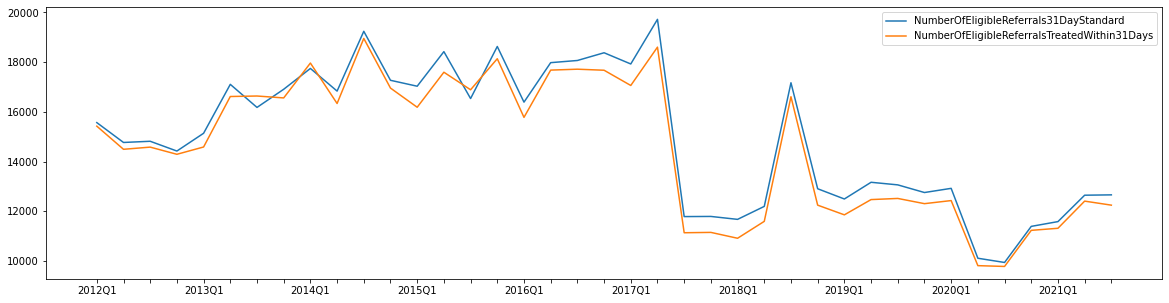

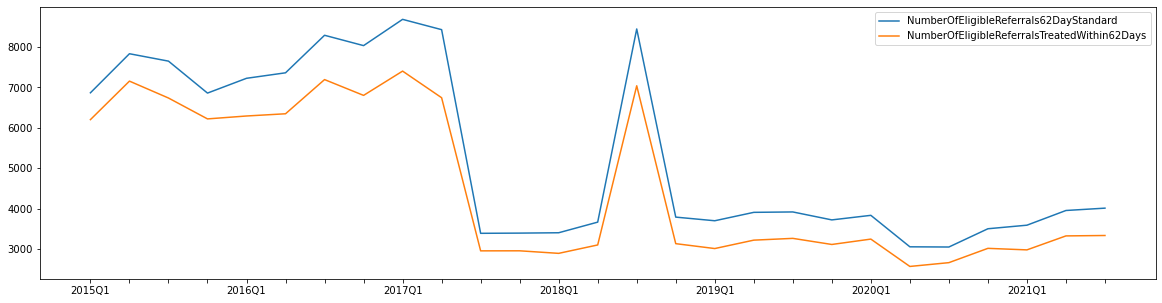

In [61]:
all_regions = ['S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, axs = plt.subplots(1, 1, figsize=(20,5))

plot_cancer_data(cancer_data_31, all_regions, ['All Cancer Types'], ['2012Q1','2021Q3'], 'NumberOfEligibleReferrals31DayStandard')
plot_cancer_data(cancer_data_31, all_regions, ['All Cancer Types'], ['2012Q1','2021Q3'], 'NumberOfEligibleReferralsTreatedWithin31Days')
#axs.plot([32.5,32.5], [0,1600], color='r', linewidth=3)

every_nth = 4
for n, label in enumerate(axs.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend()
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(20,5))

plot_cancer_data(cancer_data_62, all_regions, ['All Cancer Types'], ['2015Q1','2021Q3'], 'NumberOfEligibleReferrals62DayStandard')
plot_cancer_data(cancer_data_62, all_regions, ['All Cancer Types'], ['2015Q1','2021Q3'], 'NumberOfEligibleReferralsTreatedWithin62Days')
#axs.plot([32.5,32.5], [0,1600], color='r', linewidth=3)

every_nth = 4
for n, label in enumerate(axs.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend()
plt.show()

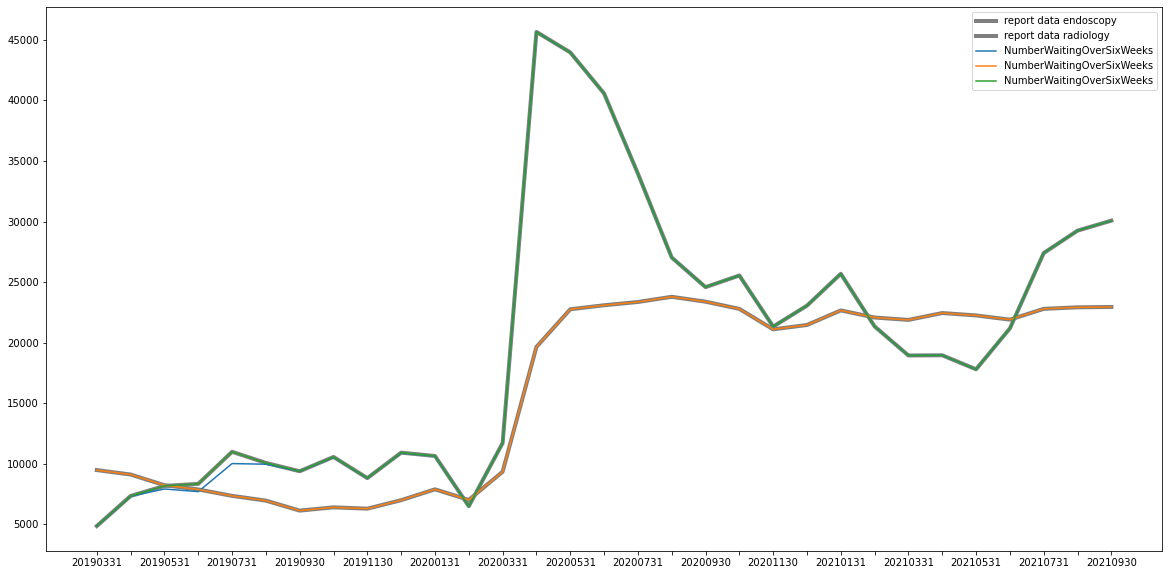

In [69]:
report_endoscopy = [9476,	9108,	8225,	7875,	7347,	6954,	6129,	6398,	6290,	6990,	7887,	7009,	9340,	19648,	22757,	23088,	23358,	23787,	23383,	22789,	21098,	21460,	22662,	22075,	21878,	22445,	22248,	21899,	22791,	22919,	22947]
report_radiology = [4854,	7338,	8167,	8337,	10985,	10068,	9380,	10561,	8811,	10916,	10640,	6491,	11710,	45663,	43969,	40581,	33963,	27034,	24585,	25546,	21327,	23056,	25687,	21338,	18941,	18956,	17799,	21178,	27400,	29249,	30076]
finalData = pd.read_csv('data.csv')

fig, axs = plt.subplots(1, 1, figsize=(20,10))

plt.plot(list(map(str,finalData['MonthEnding'])),report_endoscopy, 'tab:gray',linewidth=4, label='report data endoscopy')
plt.plot(list(map(str,finalData['MonthEnding'])),report_radiology, 'tab:gray',linewidth=4, label='report data radiology')
plot_diagnostics_data(diagnostics_data_HB, all_regions, ['Imaging'], ['All Imaging'], [20190331,20210930], 'NumberWaitingOverSixWeeks')
#plot_diagnostics_data(diagnostics_data_HB, all_regions, ['Imaging'], ['All Imaging'], [20190331,20210930], 'NumberWaitingOverFourWeeks')
plot_diagnostics_data(diagnostics_data_scot, ['S92000003'], ['Endoscopy'], ['All Endoscopy'], [20190331,20210930], 'NumberWaitingOverSixWeeks')
plot_diagnostics_data(diagnostics_data_scot, ['S92000003'], ['Imaging'], ['All Imaging'], [20190331,20210930], 'NumberWaitingOverSixWeeks')
#axs.plot([32.5,32.5], [0,1600], color='r', linewidth=3)

every_nth = 2
for n, label in enumerate(axs.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend()
plt.show()